# Project Name :Toxic Comment Classification
Member : Varun,Sneha,Adarsh

The primary data for the competition is, in each provided file, the comment_text column. This contains the text of a comment which has been classified as toxic or non-toxic (0...1 in the toxic column). 
The train set’s comments are entirely in english and come either from Civil Comments or Wikipedia talk page edits. The test data's comment_text columns are composed of multiple non-English languages.

Dataset have 223549 rows and columns 8

columns are:

id - dentifier within each file.

comment_text - the text of the comment to be classified.

toxic : whether or not the comment is classified as toxic

severe_toxic

obscene

threat 

insult

identity_hate


## Challenges:

1. Preprocessing 

2. Word2vac VS tf-Idf

3. Using best ML algorithm

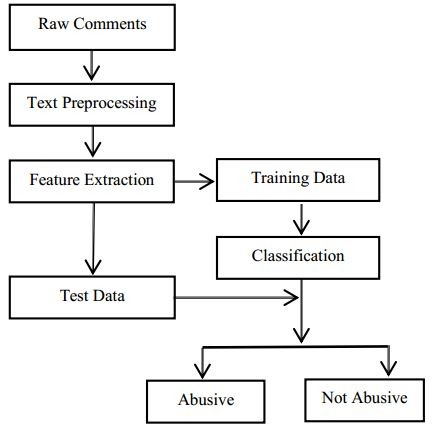

In [1]:
from IPython.display import Image
Image("flow.jpeg")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

## Loading data

In [3]:
data = pd.read_csv("jigsaw-toxic-comment-train.csv")

In [4]:
data.head(10)

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   
5  00025465d4725e87  "\n\nCongratulations from me as well, use the ...      0   
6  0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1   
7  00031b1e95af7921  Your vandalism to the Matt Shirvington article...      0   
8  00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...      0   
9  00040093b2687caa  alignment on this subject and which are contra...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  
5             0        0       0       0              0  
6             1        1       0       1              0  
7             0        0       0       0              0  
8             0        0       0       0              0  
9             0        0       0       0              0

## Apply EDA

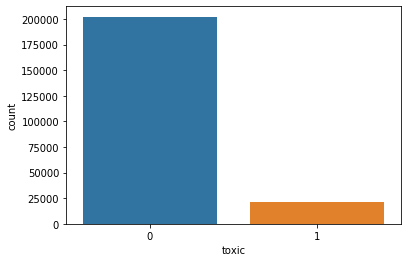

In [5]:
sns.countplot(x="toxic",data=data)

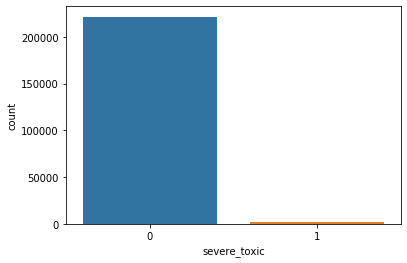

In [6]:
sns.countplot(x="severe_toxic",data=data)

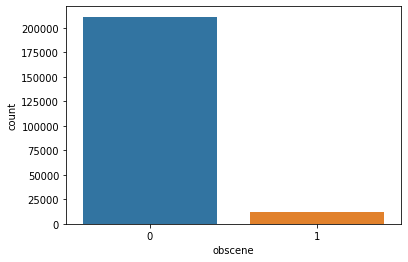

In [7]:
sns.countplot(x="obscene",data=data)

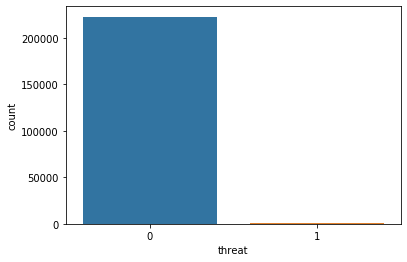

In [8]:
sns.countplot(x="threat",data=data)

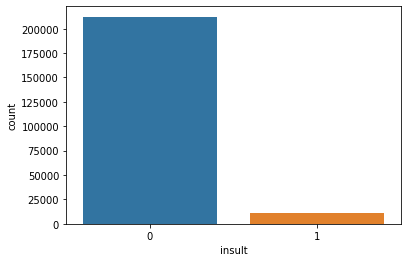

In [9]:
sns.countplot(x="insult",data=data)

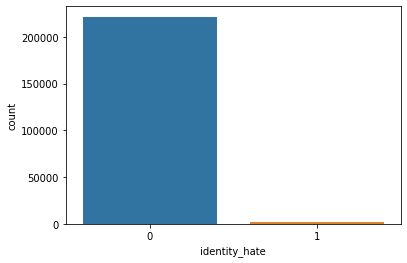

In [10]:
sns.countplot(x="identity_hate",data=data)

## wordcloud


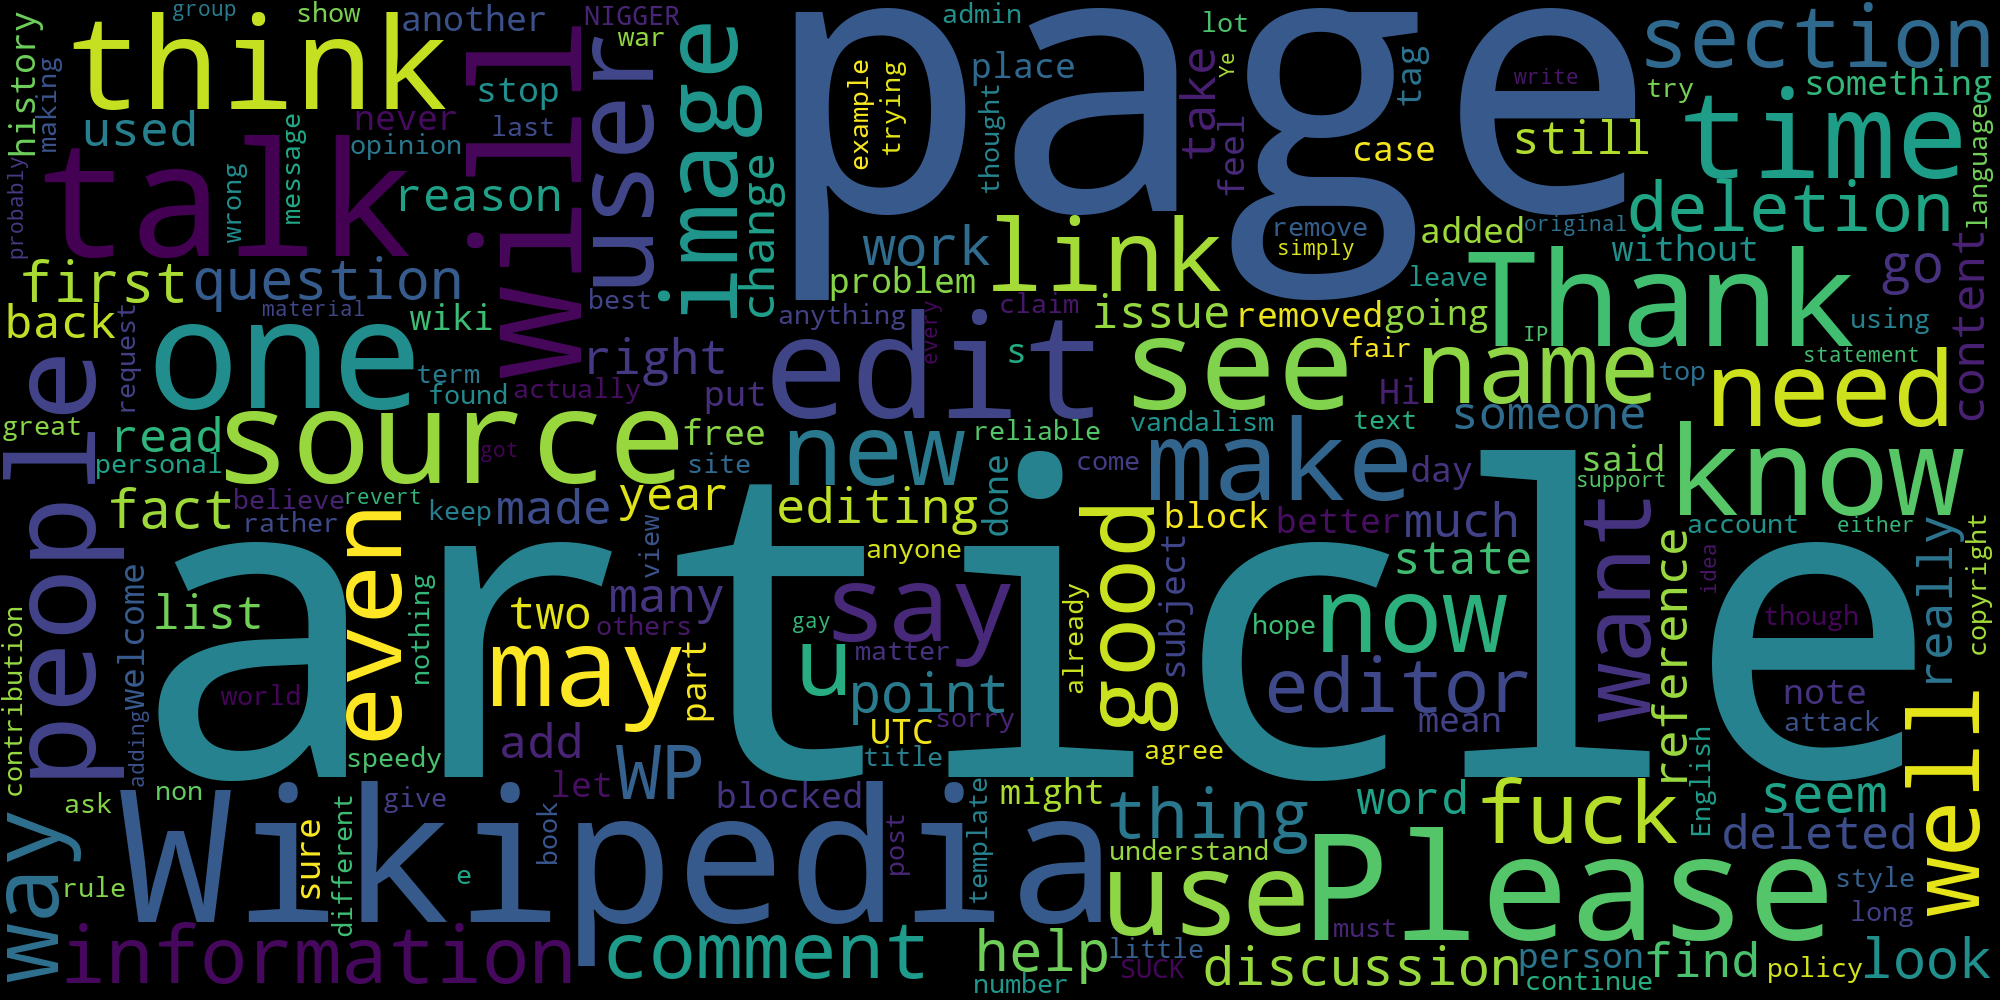

In [11]:
from wordcloud import WordCloud
import plotly.express as px
def nonan(x):
    if type(x) == str:
        return x.replace("\n", "")
    else:
        return ""

text = ' '.join([nonan(abstract) for abstract in data["comment_text"]])
wordcloud = WordCloud(max_font_size=None, background_color='black', collocations=False,
                      width=2000, height=1000).generate(text)
fig = px.imshow(wordcloud)
fig.update_layout(title_text='Common words in comments')

In [12]:
data['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

# <h2> Preprocessing of Text </h2>

# - Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords

In [13]:
data['comment_text'] = data['comment_text'].str.lower()

In [14]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [15]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

In [16]:
from bs4 import BeautifulSoup

In [17]:
data.shape

(223549, 8)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223549 entries, 0 to 223548
Data columns (total 8 columns):
id               223549 non-null object
comment_text     223549 non-null object
toxic            223549 non-null int64
severe_toxic     223549 non-null int64
obscene          223549 non-null int64
threat           223549 non-null int64
insult           223549 non-null int64
identity_hate    223549 non-null int64
dtypes: int64(6), object(2)
memory usage: 13.6+ MB


## Delete all the duplicates rows

In [19]:
#Sorting data according to ProductId in ascending order
sorted_data=data.sort_values('id', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [20]:
#Deduplication of entries
data=sorted_data.drop_duplicates(subset={"id","comment_text","toxic","severe_toxic","obscene","threat","insult","identity_hate"}, keep='first', inplace=False)
data.shape

(223549, 8)

In [21]:
data=data.head(10000)

In [22]:
data['comment_text']  = data['comment_text'] .fillna("").apply(preprocess)

In [23]:
data.head()

id                                       comment_text  \
0      0000997932d777bf  explanation why the edits made under my userna...   
1      000103f0d9cfb60f  d aww  he matches this background colour i am ...   
2      000113f07ec002fd  hey man  i am really not trying to edit war  i...   
95737  00013fa6fb6ef643  wehwalt  ftr  i am not objecting to text about...   
3      0001b41b1c6bb37e  more i can not make any real suggestions on im...   

       toxic  severe_toxic  obscene  threat  insult  identity_hate  
0          0             0        0       0       0              0  
1          0             0        0       0       0              0  
2          0             0        0       0       0              0  
95737      0             0        0       0       0              0  
3          0             0        0       0       0              0

## Apply TF-IDF nlp algo to covert words to vectors

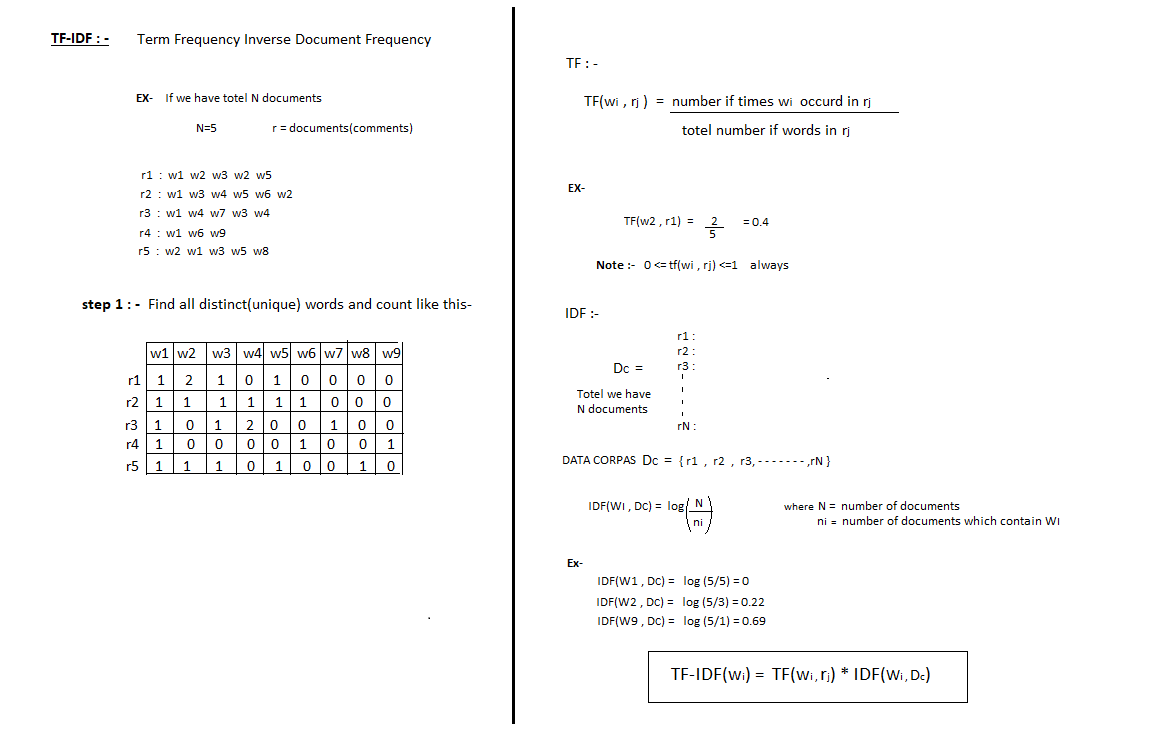

In [24]:
from IPython.display import Image
Image("project.png")

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix

In [26]:
tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(data['comment_text'].values)

In [27]:
final_tf_idf.get_shape()

(10000, 38443)

In [28]:
features = tf_idf_vect.get_feature_names()
len(features)

38443

In [32]:
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns=['feature','tfidf']
    return df

top_tfidf = top_tfidf_feats(final_tf_idf[1,:].toarray()[0],features,10)
    

In [33]:
top_tfidf

feature     tfidf
0         aww  0.356983
1        2016  0.345712
2   seemingly  0.318556
3      colour  0.306080
4       stuck  0.286785
5          51  0.277182
6     matches  0.272379
7     january  0.244476
8          21  0.233021
9  background  0.231400

In [34]:
data.head()

id                                       comment_text  \
0      0000997932d777bf  explanation why the edits made under my userna...   
1      000103f0d9cfb60f  d aww  he matches this background colour i am ...   
2      000113f07ec002fd  hey man  i am really not trying to edit war  i...   
95737  00013fa6fb6ef643  wehwalt  ftr  i am not objecting to text about...   
3      0001b41b1c6bb37e  more i can not make any real suggestions on im...   

       toxic  severe_toxic  obscene  threat  insult  identity_hate  
0          0             0        0       0       0              0  
1          0             0        0       0       0              0  
2          0             0        0       0       0              0  
95737      0             0        0       0       0              0  
3          0             0        0       0       0              0

In [35]:
X=final_tf_idf
y=data[['toxic','severe_toxic','obscene','threat','insult','identity_hate']] 

## split data 70:30 ratio

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [37]:
X_train.shape

(7000, 38443)

In [38]:
X_test.shape

(3000, 38443)

In [39]:
y_train.shape

(7000, 6)

In [40]:
y_test.shape

(3000, 6)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")

        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")

## apply desion tree to multilabel classification

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 11218 tasks      

Best paramters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 90.49%
_______________________________________________
CLASSIFICATION REPORT:
                    0     1           2     3           4     5    micro avg  \
f1-score     0.383028   0.0    0.570934   0.0    0.457961   0.0     0.423378   
precision    0.938202   0.0    0.926966   0.0    0.719101   0.0     0.861423   
recall       0.240634   0.0    0.412500   0.0    0.335958   0.0     0.280659   
support    694.000000  63.0  400.000000  21.0  381.000000  80.0  1639.000000   

             macro avg  weighted avg  samples avg  
f1-score      0.235320      0.407979     0.021357  
precision     0.430712      0.790651     0.021905  
recall        0.164849      0.280659     0.021686  
support    1639.000000   1639.000000  1639.000000  
Test Result:
Accuracy Score: 91.97%
_______________________________________________
CLASSIFICATION REPORT:
  

/home/varun/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/home/varun/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.

/home/varun/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.



## Apply TF-IDF with Bi-gram nlp algo to covert words to vectors

In [43]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(data['comment_text'].values)

In [44]:
final_tf_idf.get_shape()

(10000, 307935)

In [45]:
X=final_tf_idf
y=data[['toxic','severe_toxic','obscene','threat','insult','identity_hate']] 

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

## apply desion tree to multilabel classification(Bi-gram)

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 11218 tasks      

Best paramters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 90.77%
_______________________________________________
CLASSIFICATION REPORT:
                    0     1           2     3           4     5    micro avg  \
f1-score     0.517312   0.0    0.680660   0.0    0.538732   0.0     0.532549   
precision    0.881944   0.0    0.850187   0.0    0.818182   0.0     0.854447   
recall       0.365994   0.0    0.567500   0.0    0.401575   0.0     0.386821   
support    694.000000  63.0  400.000000  21.0  381.000000  80.0  1639.000000   

             macro avg  weighted avg  samples avg  
f1-score      0.289451      0.510394     0.032126  
precision     0.425052      0.771124     0.034238  
recall        0.222512      0.386821     0.031843  
support    1639.000000   1639.000000  1639.000000  
Test Result:
Accuracy Score: 91.73%
_______________________________________________
CLASSIFICATION REPORT:


/home/varun/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/home/varun/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.

/home/varun/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.

